In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/Mydrive/LG_AI_2021/LG-Vision-Academy/basic_DL/Day2/answer

In [3]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Understanding Gradient Descent

본 자료는 딥러닝 모델을 학습시키는 원리인 경사하강법(gradient descent)과 역전파(backpropagation)에 대한 이해를 목적으로 만든 자료입니다.    
먼저 가장 단순한 선형 회귀 모델에 대한 경사하강법을 `numpy`와 `torch` 패키지를 활용해 구현해보려고 합니다.   

그 뒤, 로지스틱 회귀 모델을 `numpy` 패키지로 학습하며 역전파의 개념에 대해 상기해보려 합니다.      
또한, 딥러닝 패키지 중 하나인 `torch`를 통해 구현했을 때는 어떤 점이 다른지 살펴볼 것입니다.

# 단순 선형 회귀 모델 (Regression 문제)

In [4]:
# # Making linear data
# X = np.arange(-200, 200)
# delta = np.random.uniform(-50, 50, size=(400,))
# gamma = np.random.uniform(-30, 30, size=(400,))
# y = 0.5*X + 13 + delta - gamma

# def normalize(v):
#     norm = np.linalg.norm(v)
#     if norm == 0: 
#         return v
#     return v / norm

# X = normalize(X)
# y = normalize(y)

# with open('../data/linear_regression.pickle', 'wb') as f:
#     pickle.dump([X, y], f)

In [5]:
# Load the dataset
with open('../data/linear_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

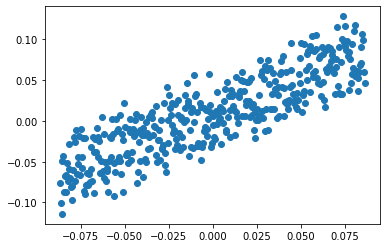

In [6]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [P1] `Numpy` 패키지를 활용해 최적의 선형 회귀 모델을 찾아봅시다.

최적의 모델이란, 모든 데이터에 대한 예측값과 실제값의 차이를 가장 적게 만들어주는 최적의 파라미터를 가진 모델입니다.      
예시로 주어진 회귀 문제를 해결하기 위해선, 일반적으로 MSE(Mean Squared Error) 손실 함수를 사용해 모델을 학습합니다.

**MSE loss**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients calculation**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b)) * X_i
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

주어진 손실 함수와 계산된 gradient를 바탕으로, 아래 빈칸을 채워넣어 모델을 학습시키면 됩니다.

In [7]:
# Training setting
epochs = 1000
learning_rate = 0.5

# Model weights and bias parameters
w = 0.0
b = 0.0

# Store model parameters and loss for visualization
w_list, b_list, loss_list = [], [], []

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################
######## Hint: use +, -, *, /, **, np.mean() ########
    loss = np.mean((y - (w*X + b))**2)   # MSE loss
    
    dw = -2 * np.mean((y - (w*X + b)) * X)   # derivative w.r.t to w
    db = -2 * np.mean(y - (w*X + b))   # derivative w.r.t to b
#################################################
    
    
    w = w - learning_rate * dw   # update w
    b = b - learning_rate * db   # update b
    
    w_list.append(w)
    b_list.append(b)
    loss_list.append(loss)

print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.7773
Trained model bias : 0.0086


학습을 통해 다음의 것들을 시각화해보려 합니다.   
1. 학습이 완료된 최적의 모델
2. Epoch(에폭, 모델 학습의 반복 횟수)에 따른 학습된 모델
3. Epoch에 따른 손실값 변화 그래프

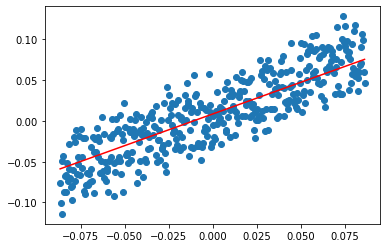

In [8]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w * X + b
plt.plot(X, y_pred, color='red')
plt.show()

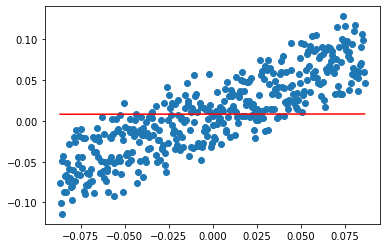

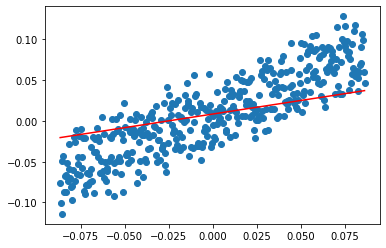

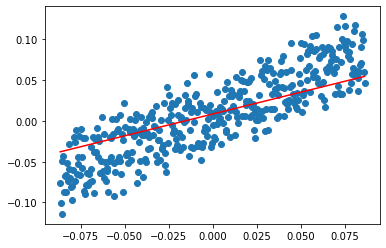

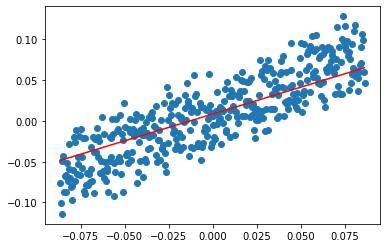

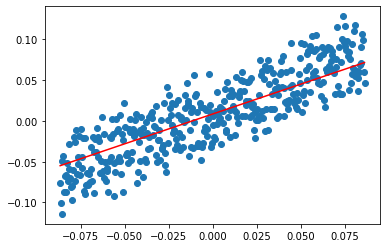

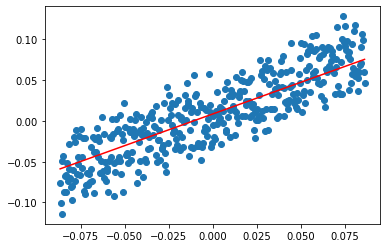

In [9]:
# Visualize the intermediate trained model
epochs_list = [1, 200, 400, 600, 800, 1000]

for i in range(len(epochs_list)):
    plt.scatter(X, y)   # scatter the original data
    
    # Load trained weights in specific epoch
    epoch = epochs_list[i] - 1   # In python, all indexes start from 0
    w = w_list[epoch]
    b = b_list[epoch]
    
    y_pred = w * X + b
    plt.plot(X, y_pred, color='red')
    plt.show()

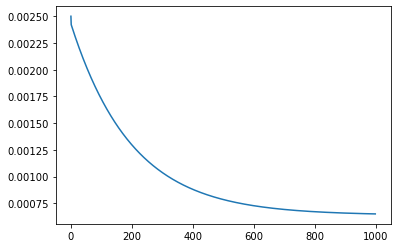

In [10]:
# Visualize the change of loss
plt.plot(loss_list)
plt.show()

## [P2] 이번엔 `Pytorch` 패키지를 활용해 모델을 정의하고 경사하강법을 통해 학습하려 합니다.

In [11]:
import torch
import torch.nn as nn

### 먼저, 데이터를 텐서 형태로 변환해야합니다.

연산을 위해 X와 y를 텐서로 변환시켜주세요. 단, 텐서 타입 중 [float](https://pytorch.org/docs/stable/tensors.html) 타입으로 바꿔줄 것입니다.    
그 다음, (400, 1)의 모양으로 변환시켜 주세요.

In [12]:
# make X to float tensor type
X_tensor = torch.FloatTensor(X) # torch.tensor(X).float()
y_tensor = torch.FloatTensor(y)

# reshpae as (400, 1)
X_tensor = X_tensor.reshape(-1, 1)
y_tensor = y_tensor.reshape(-1, 1)

### 선형 회귀 모델을 정의해야 합니다.

**(Hint 1)** 각 데이터 샘플마다 피처와 라벨의 차원이 몇 개일지 생각해봅시다.    
**(Hint 2)** [Reference](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)를 참고해주세요.

In [13]:
model = nn.Linear(1, 1, bias=True)
model.state_dict()

OrderedDict([('weight', tensor([[0.4002]])), ('bias', tensor([0.4174]))])

### 모델을 학습하기 위한 손실 함수를 정의해야 합니다.

회귀 문제의 경우 [MSE 손실 함수](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)를, 분류 문제일 경우에는 [교차 엔트로피](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)를 손실 함수로 사용합니다.

In [14]:
criterion = nn.MSELoss()

### 또한, 경사하강법의 다양한 종류 중에서 어떤 것을 사용할지 결정해야 합니다.

일반적으로 `optimizer`란 이름의 변수로, 이를 정의합니다.   
옵티마이저는 `torch` 패키지 안의 [`optim`](https://pytorch.org/docs/stable/optim.html)이란 폴더에 구현이 되어 있습니다.    
간단하게 SGD를 구현하고, 적절한 argument를 채워봅시다.

In [15]:
import torch.optim as optim

# define SGD
optimizer = optim.SGD(model.parameters(), lr=0.5)

### 모델 학습의 반복 횟수를 결정하는 하이퍼파라미터 `에폭(epoch)`은 python의 for문을 통해 구현합니다. 

하나의 에폭 안에서는 다음과 같이 모델 파라미터에 대한 경사하강법을 진행합니다.    
다음의 [예제](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)를 통해, 아래 빈칸들을 채워보세요.

In [16]:
epochs = 1000

for e in range(epochs):
    # zero grad before the gradient descent
    optimizer.zero_grad()
    
    pred_y = model(X_tensor) # model.forward()
    loss = criterion(pred_y, y_tensor)
    
    # gradient descent
    # calculate gradients
    loss.backward()
    
    # update model with theire gradients
    optimizer.step()

In [17]:
# trained parameter value
model.state_dict()

OrderedDict([('weight', tensor([[0.8100]])), ('bias', tensor([0.0086]))])

학습이 완료된 모델의 경우 다음과 같이 그려지며, `numpy` 패키지로 학습했던 결과와 동일하게 출력됩니다.

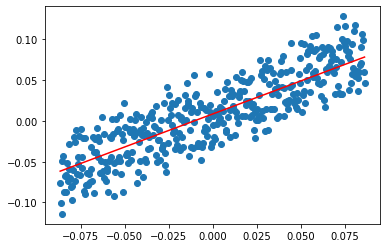

In [18]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data

# to plot by matplotlib, should transform output as numpy array type
y_pred = model(X_tensor).detach().numpy()
plt.plot(X, y_pred, color='red')
plt.show()

이처럼, `Pytorch` 패키지를 활용하면 경사하강법을 단 몇 줄의 코드로 구현하여 쉽게 모델을 학습할 수 있습니다.

# 로지스틱 회귀 모델 (Classification 문제)

In [19]:
# # Load the dataset
# data = pd.read_csv('../data/logistic_regression.csv')
# data.head()   # show the 5 elements

In [20]:
# data.to_pickle('../data/logistic_regression.pickle')

In [21]:
with open('../data/logistic_regression.pickle', 'rb') as f:
    data = pickle.load(f)
    
data.head()   # show the 5 elements

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 로지스틱 회귀 모델을 이용해 유저의 `Age` 정보만을 가지고 구매를 했는지(1), 혹은 안했는지(0)를 학습해봅시다.

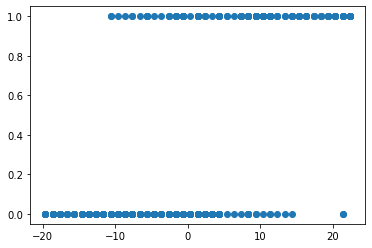

In [22]:
# Extract 'Age' and 'Purchased' data
X = data['Age'].to_numpy(dtype=np.float32)
y = data['Purchased'].to_numpy()

# Normalize 'Age' value
def normalize(v):
    v = v - v.mean()
    return v

X = normalize(X)

# Visualizing the dataset
plt.scatter(X, y)
plt.show()

### 눈으로 데이터를 살펴봤을때, 구매를 한 사람들 중에서 나이가 많은 사람들이 많다는 경향성을 쉽게 파악할 수 있습니다.

## [P3] 이번에도 `Numpy` 패키지로만 로지스틱 회귀 모델을 학습해보겠습니다.

로지스틱 회귀 모델은 0부터 1 사이의 값을 출력해주는 S 모양의 로지스틱 함수로 만들어졌습니다.   
따라서 출력값은 확률의 의미를 지니고 있으며, 0.5의 출력값을 기준으로 0과 1의 이진 클래스로 분류해주는 모델이 됩니다.
![logistic](./img/logistic_function.png)

로지스틱 모델은 최대 가능도 추정(maximum likelihood estimation)을 기반으로 모델을 학습합니다.     
어려운 개념이기에, 본 자료에서는 주어진 수식을 코드로 구현하는 연습만 해보려고 합니다.

**Logistic regression model** (w와 b 파라미터 두가지)
\begin{equation*}
P(y_i=1|X_i) = \frac{1}{1 + e^{-(wX_i + b)}}
\end{equation*}

**Loss function**
\begin{equation*}
-\frac{1}{n} \sum_{i=1}^n (y_i * log(P(y_i=1|X_i)) + (1 - y_i) * log(1 - P(y_i=1|X_i)))
\end{equation*}

**Gradients calculation**
\begin{equation*}
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n ((P(y_i=1|X_i) - y_i) * X_i)
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial w} = \frac{1}{n} \sum_{i=1}^n (P(y_i=1|X_i) - y_i)
\end{equation*}

In [23]:
# Training setting
epochs = 1000
learning_rate = 1e-3

# Model weights and bias parameters
w = 0.0
b = 0.0

# Perform Gradient Descent
for i in range(epochs):
    
    
#################################################
######## Hint: use +, -, *, /, **, np.mean(), #######
########           np.exp(), np.log() ###########
    y_pred = 1 / (1 + np.exp(-(w*X + b)))   # Logistic regression
    loss = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))   # Likelihood loss
    
    dw = np.mean((y_pred - y) * X)   # gradients w.r.t to w
    db = np.mean(y_pred - y)   # gradients w.r.t to b
    
    # Update model weights and bias
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
#################################################


print('Trained model weights : %.4f' % w)
print('Trained model bias : %.4f' % b)

Trained model weights : 0.1696
Trained model bias : -0.1248


학습 결과를 시각화하면 다음과 같습니다.

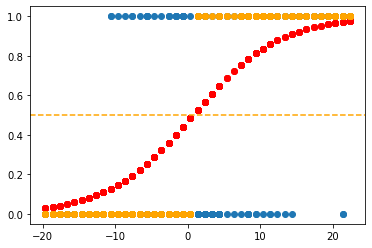

In [24]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = 1 / (1 + np.exp(-(w*X + b)))
plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred < 0.5)
index2 = (y == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index], color='orange')

plt.show()

## [P4] `Pytorch` 패키지를 통해서 로지스틱 회귀 모델을 학습해보겠습니다.

선형 회귀 모델을 통해 배웠던 순서대로 다음의 것들을 먼저 구현해보세요.
1. 데이터를 텐서 형태로 변환
2. 모델 정의
3. 손실 함수 정의
4. 옵티마이저 정의

In [25]:
# transform data to tensor
# make X and y to float tensor type
X_tensor = torch.FloatTensor(X) # torch.tensor(X).float()
y_tensor = torch.FloatTensor(y)

# reshpae as (400, 1)
X_tensor = X_tensor.reshape(-1, 1)
y_tensor = y_tensor.reshape(-1, 1)

모델의 경우, [`nn.Module`](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module)을 상속받은 새로운 로지스틱 회귀 모델에 대한 클래스를 만들어볼 것입니다. 

In [26]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=True)
        
    def forward(self, x):
        out = self.linear(x)
        out = 1 / (1 + torch.exp(-out))
        
        return out

In [27]:
model = LogisticRegression(1, 1)
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.5302]])),
             ('linear.bias', tensor([-0.2419]))])

손실 함수는 이진 클래스에 대한 교차 엔트로피인 [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)로 설정해주세요.

In [28]:
criterion = nn.BCELoss()

옵티마이저는 이전과 동일하게 SGD를 사용해주시면 됩니다.

In [29]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 정의한 변수들을 활용해, 경사하강법을 반복적으로 사용해 학습시켜 봅시다.

In [30]:
epochs = 1000

for e in range(epochs):
    # zero grad before the gradient descent
    optimizer.zero_grad()
    
    pred_y = model(X_tensor) # model.forward()
    loss = criterion(pred_y, y_tensor)
    
    # gradient descent
    # calculate gradients
    loss.backward()
    
    # update model with theire gradients
    optimizer.step()

In [31]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.1714]])),
             ('linear.bias', tensor([-0.3344]))])

학습된 결과를 보면, `Numpy` 패키지를 사용했을 때와 동일한 결과인 것을 알 수 있습니다.    
이처럼 `pytorch` 패키지를 통해 경사하강법을 사용할 경우, 손실 함수에 대한 별도의 구현과 미분값 계산의 필요성이 사라집니다.

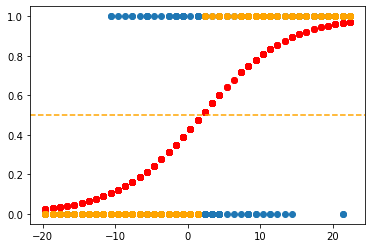

In [32]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = model(X_tensor).detach().numpy().reshape(-1)
plt.scatter(X, y_pred, color='red')
plt.axhline(y=0.5, color='orange', linestyle='--')   # show 0.5 threshold line

# Accurate results are colored as orange
index1 = (y == 0) * (y_pred < 0.5)
index2 = (y == 1) * (y_pred > 0.5)
index = index1 + index2
plt.scatter(X[index], y[index.reshape(-1,)], color='orange')

plt.show()